In [2]:
# import function fitting libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv


# Motor force and torque constant measurements

This script requires a .csv file containing the following information:

- RPM (or radians per second), Force (N), Torque (Nm) 

Each of these values need to be measured at steady-state of operationl. The script will then calculate the motor force and torque constants.

Fitting curve for motor force constant and torque constant
[ 0.0035373  -0.08732939  2.25058452]
Motor force constant for Aerial Gym:  0.0035373015879891136
[0.13672872]
Motor torque constant for Aerial Gym:  0.13672872490537422


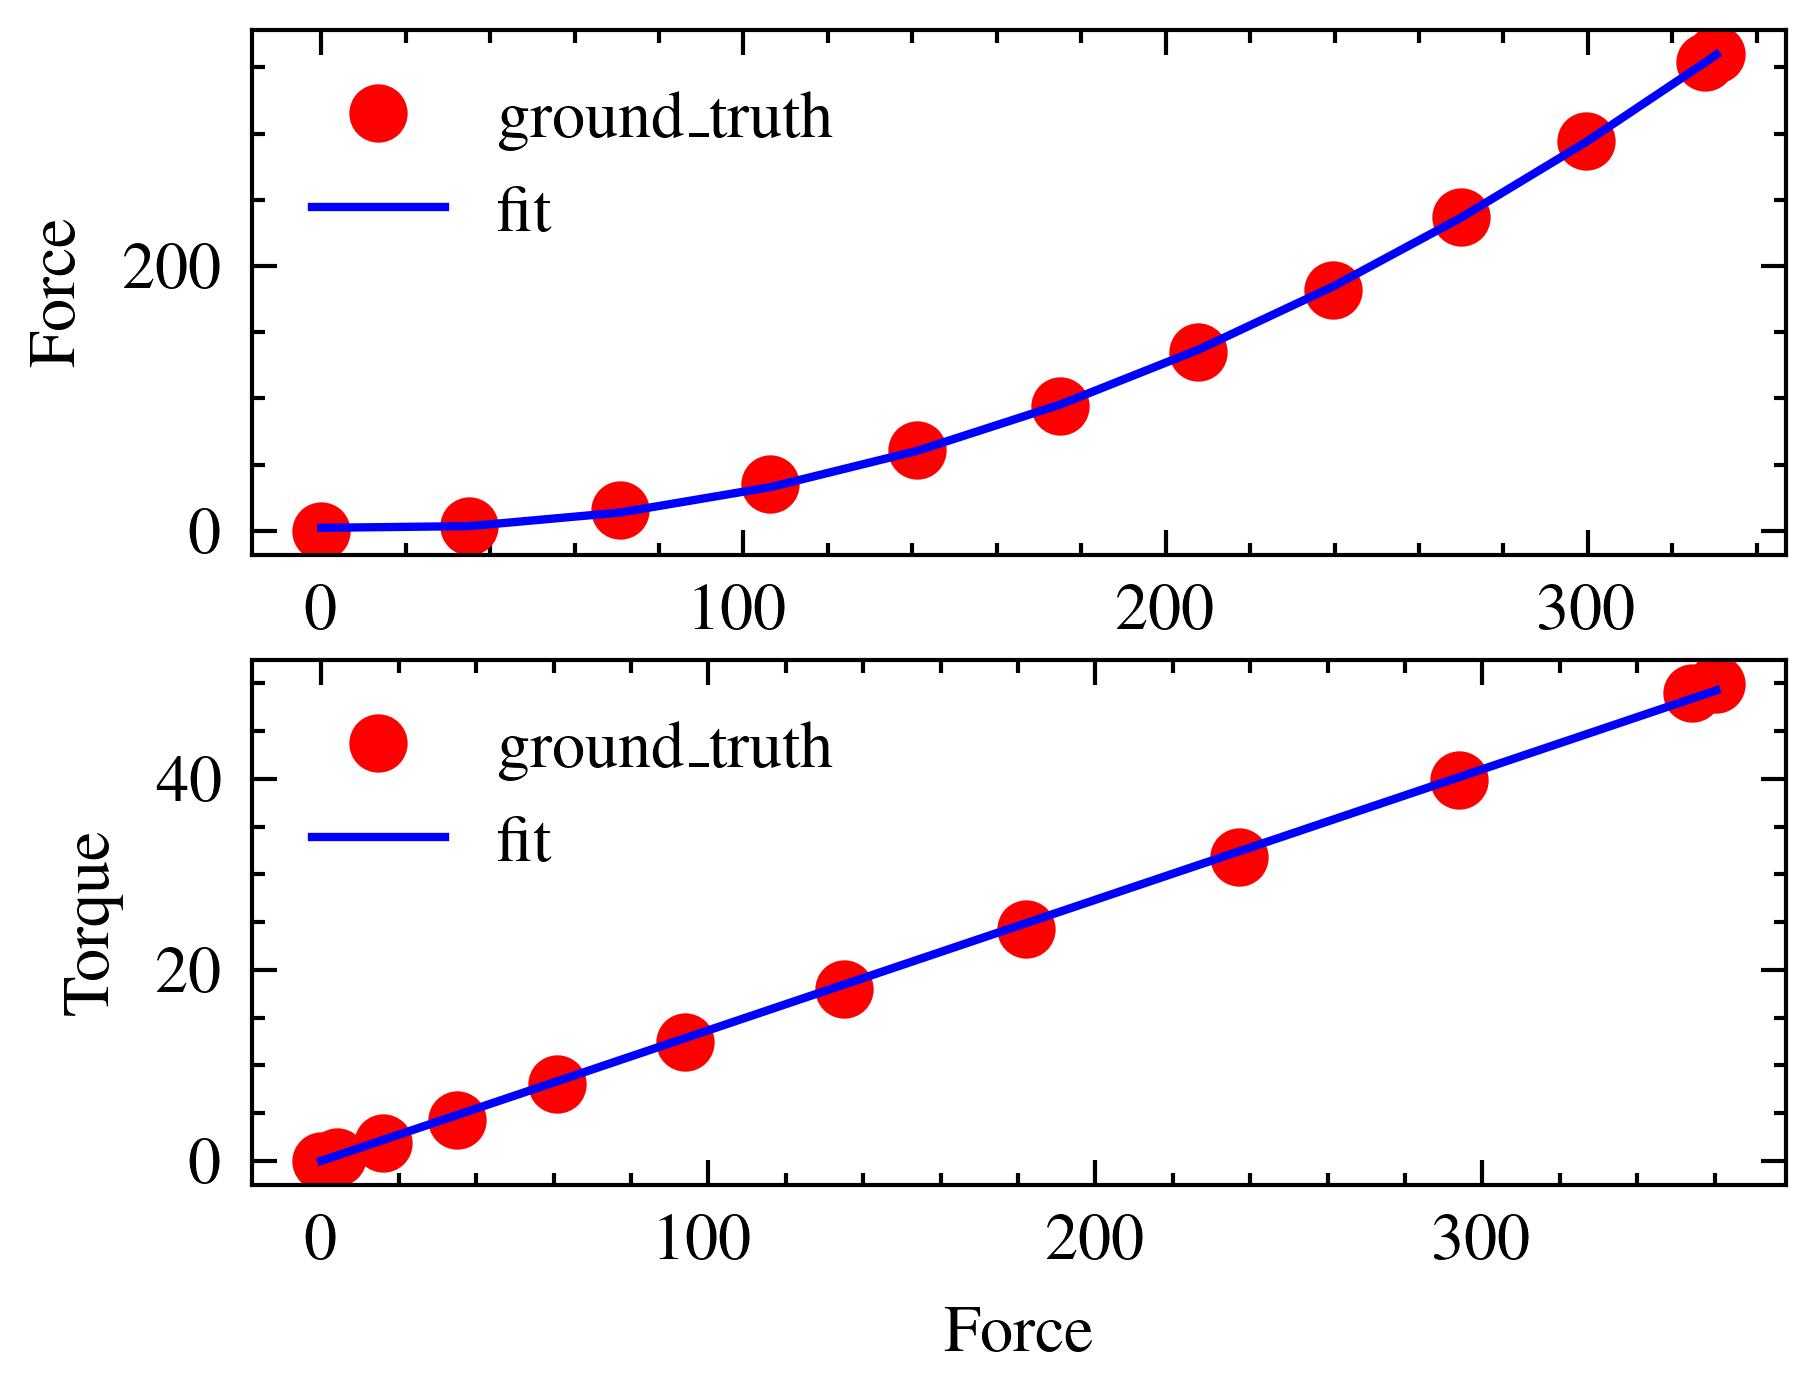

In [8]:
# motor model
def motor_force_model(rps, k1, k2, k3):
    return k1*rps**2 + k2*rps + k3

def motor_torque_model(force, torque_constant):
    return force * torque_constant

# data is read from a .csv file that conains measures RPS, Force, and Torque values at steady state for the motor
motor_data = []
with open('sample_vertiq_motor_data_force_torque.csv') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        for i in range(len(row)):
            row[i] = row[i].strip()
        motor_data.append(row)

motor_data_np = np.array(motor_data)
rps = np.array(motor_data_np[:,0], dtype=float) / 60  # rotations per minute to radians per second
force = np.array(motor_data_np[:,1], dtype=float)
torque = np.array(motor_data_np[:,2], dtype=float)

print("Fitting curve for motor force constant and torque constant")
# curve fitting
popt, pcov = curve_fit(motor_force_model, rps, force)
print(popt)
print("Motor force constant for Aerial Gym: ", popt[0])

# figure 1 for motor force constant fitting
fix, ax = plt.subplots(2,1)

# plot the data
ax[0].plot(rps, force, 'ro', label="ground_truth")
ax[0].plot(rps, motor_force_model(rps, *popt), 'b-', label="fit")
ax[0].set_xlabel('RPS')
ax[0].set_ylabel('Force')
ax[0].legend()

# figure 2 for motor torque constant fitting
popt_torque, pcov_torque = curve_fit(motor_torque_model, force, torque)
print(popt_torque)
print("Motor torque constant for Aerial Gym: ", popt_torque[0])

# plot the data
ax[1].plot(force, torque, 'ro', label="ground_truth")
ax[1].plot(force, motor_torque_model(force, *popt_torque), 'b-', label="fit")
ax[1].set_xlabel('Force')
ax[1].set_ylabel('Torque')
ax[1].legend()

plt.show()

# Motor time-constant measurement


This file expects a .csv file as in input with each row containing the following values:
- Timestamp, measured RPM (or RPS)

The script takes the data and fits a first order model to it to estimate the time constant of the motor.



Estimated time_const:  0.0362377916810697


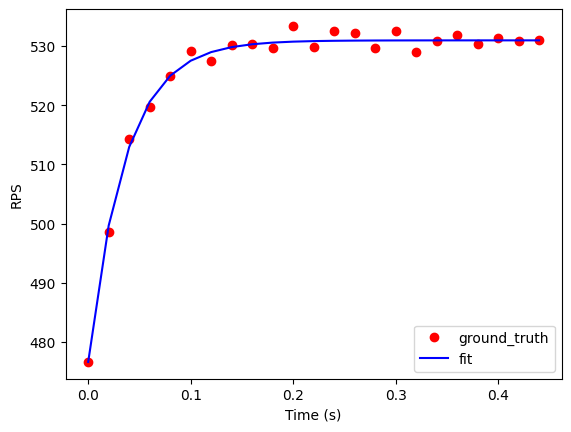

In [5]:

# step response files
# filename = "sample_time_const_data.csv"

filename = "sample_time_const_data.csv"
# filename = "sample_sim_data.csv"



data = []
with open(filename) as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        data.append(row)



# for real-world motor file 
data_np = np.array(data)
timestamp = np.array(data_np[:,0], dtype=float)
rps = np.array(data_np[:,2], dtype=float)
# select the range of data to fit to 
timestamp = timestamp[27:50]
rps = rps[27:50]

init_time = timestamp[0]
for i in range(len(timestamp)):
    timestamp[i] = timestamp[i] - init_time
# print(timestamp)


# for simulated data file:
# data_np = np.array(data)
# timestamp = np.array(data_np[:,0], dtype=float)
# rps = np.array(data_np[:,1], dtype=float)






# obtain the first order time constant
steady_state_value = rps[-1]
init_value = rps[0]


# first_order model
def first_order_model(t, tau):
    return (steady_state_value - init_value)*(1 - np.exp(-t/tau)) + init_value

# curve fitting
popt, pcov = curve_fit(first_order_model, timestamp, rps, bounds=([0.0], [0.3]))
# print("Estimated steady_value: ", popt[1])
print("Estimated time_const: ", popt[0])
# print("Estimated steady state value: ", popt[2])

# plot the curves
plt.plot(timestamp, rps, 'ro', label="ground_truth")
plt.plot(timestamp, first_order_model(timestamp, *popt), 'b-', label="fit")
plt.xlabel('Time (s)')
plt.ylabel('RPS')
plt.legend()
plt.show()


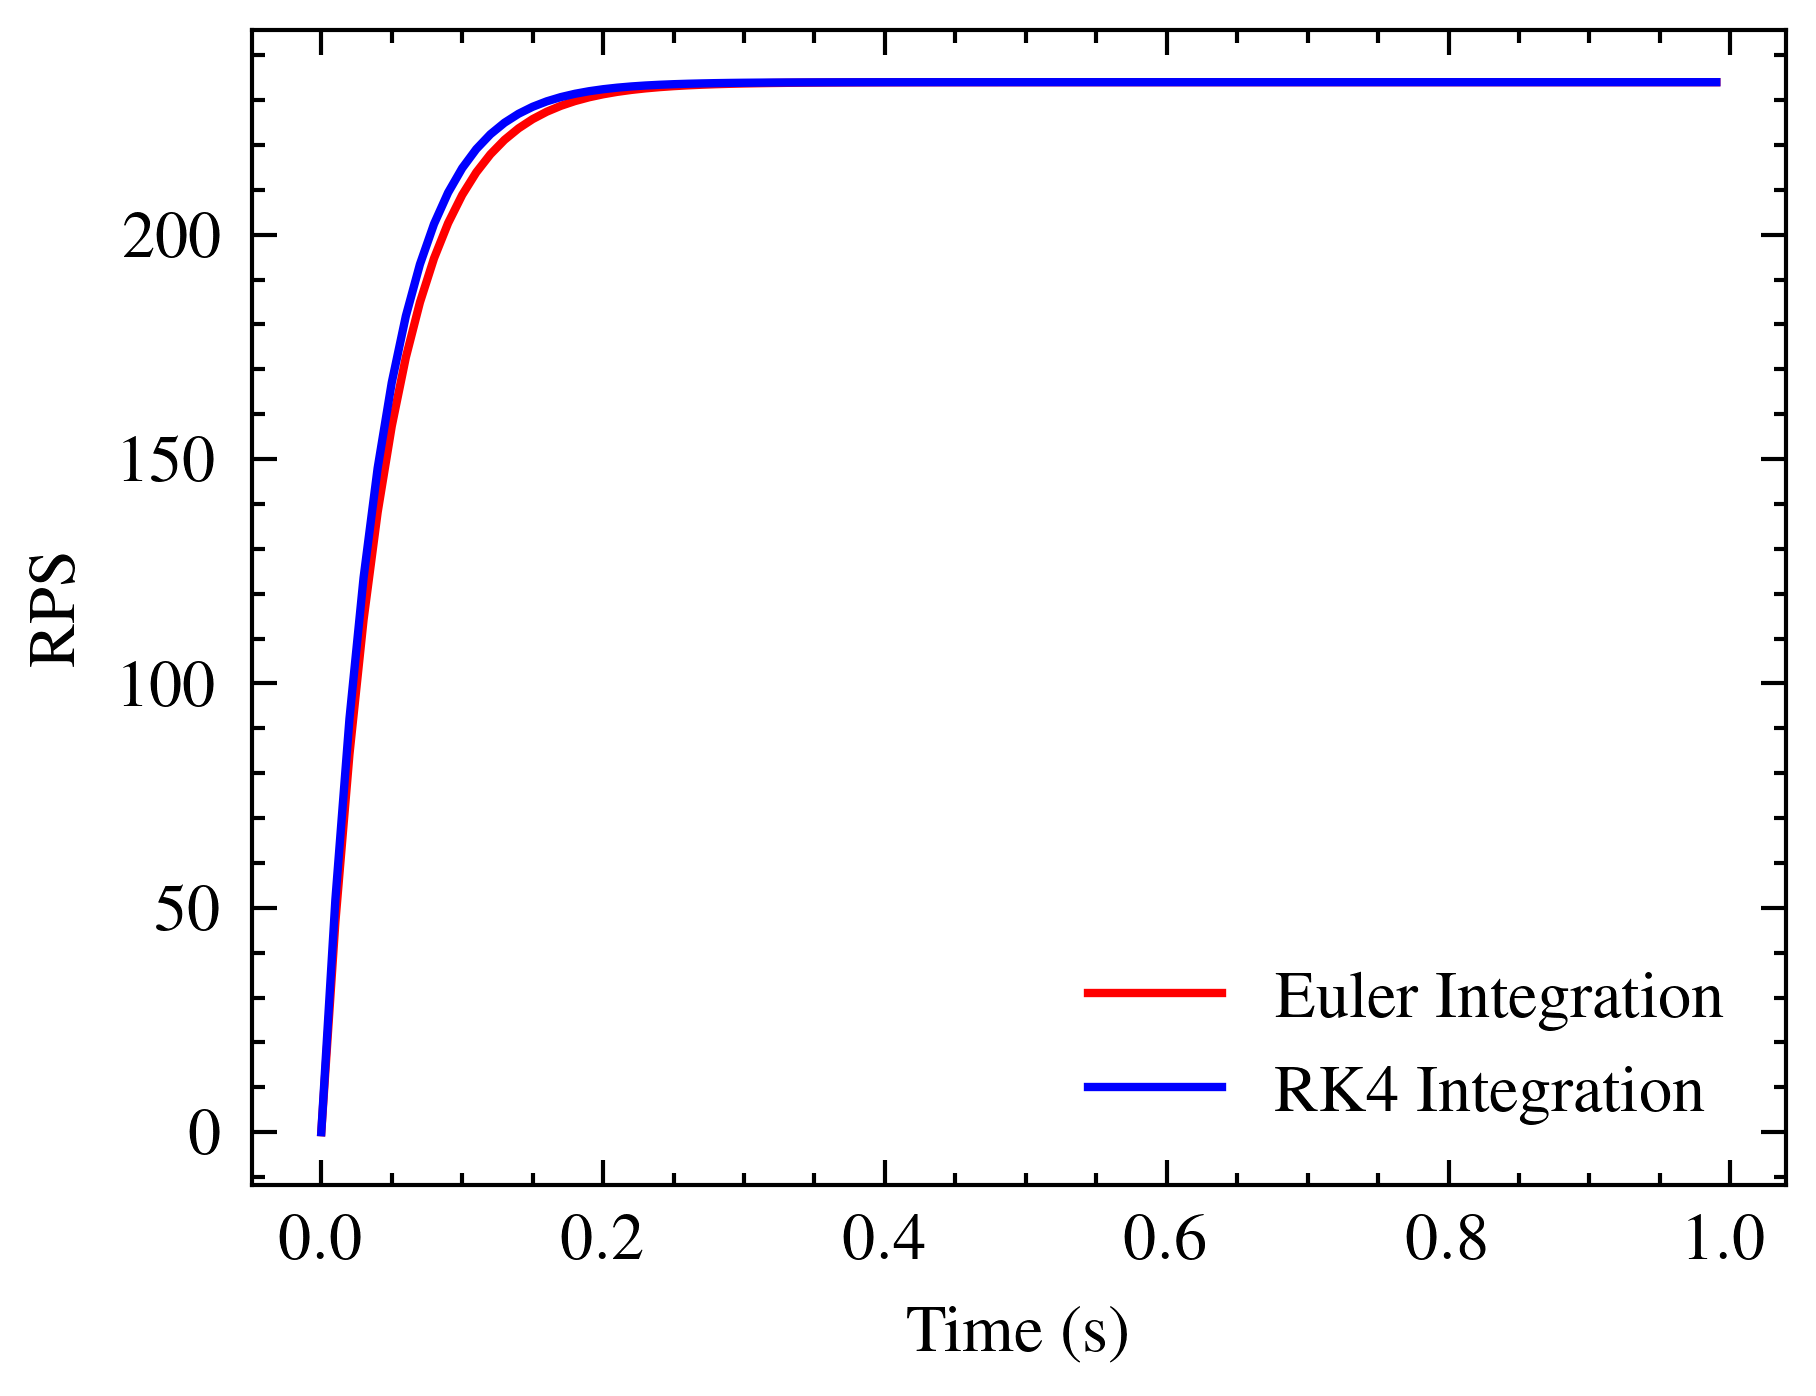

<Figure size 1980x1500 with 0 Axes>

In [ ]:
# plot data from two files together

import scienceplots
plt.style.use(['science', 'ieee'])

file1 = "sample_sim_euler_integration.csv"
file2 = "sample_sim_rk4_integration.csv"


data1 = []
with open(file1) as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        data1.append(row)
data_np1 = np.array(data1)
timestamp1 = np.array(data_np1[:100,0], dtype=float)
rps = np.array(data_np1[:100,1], dtype=float)

data2 = []
with open(file2) as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        data2.append(row)
data_np2 = np.array(data2)
timestamp2 = np.array(data_np2[:100,0], dtype=float)
rps2 = np.array(data_np2[:100,1], dtype=float)

plt.plot(timestamp1, rps, 'r-', label="Euler Integration")
plt.plot(timestamp2, rps2, 'b-', label="RK4 Integration")
plt.xlabel('Time (s)')
plt.ylabel('RPS')
plt.legend()
# plt.show()
# save plot
plt.savefig("rk4_vs_euler_comparison.pdf")






